# **Tugas Kelompok - Pembelajaran Mesin**

**Nama Anggota Kelompok:**
1. Rusyda Tsaniya Eka Putri (22/511227/NPA/19855)
2. Dicky Setiawan (22/511229/NPA/19857)
3. Muhammad Amrudien (21/479906/PA/20822)


Create a group of 3 students. 
Solve any regression task from a Kaggle dataset, then create a presentation that explains: 

1. Problem + Dataset description 
2. Data understanding
  * Data analysis using statistical techniques
  * Data analysis using visualization techniques 
3. Data preparation (+ Feature selection) 
4. Regression modelling using training data + hyperparameters tuning with GridSearchV using validation data 
5. Evaluation using testing data

## **1. Problem Dataset**

Uber dan Lyft adalah layanan transportasi online yang memungkinkan pengguna menyewa kendaraan dengan pengemudi melalui situs web atau aplikasi seluler. Namun, di Amerika Serikat, Uber dan Lyft adalah perusahaan ride-hailing terbesar kedua dengan pangsa pasar 31 persen. Namun, ada beberapa contoh unik di mana kedua layanan ride sharing itu sama. Oleh karena itu diperlukan analisis untuk memprediksi harga perjalanan yang paling tepat dengan menggunakan algoritma regresi linier. Pemilihan algoritma regresi linier pada proyek ini menggunakan data dari periode sebelumnya.

Dataset yang akan digunakan untuk pengembangan model ini berasal dari Kaggle tentang [**Uber and Lyft Dataset Boston, MA**](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma). Secara umum, dataset ini memiliki 57 atribut, tetapi atribut yang digunakan hanya yang memiliki kepentingan terhadap targetnya (price) saja.

## **2. Data Understanding**

### **Import Library**

In [ ]:
# Data processing
import pandas as pd
import numpy as np

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from numpy import mean
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import kstest
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

### **Data Load**

In [ ]:
# Menampilkan dataset
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98860,21233e39-be1d-4d52-a763-0989f24170e5,1.543745e+09,10,2,12,2018-12-02 10:02:56,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,0.0888,1.543770e+09,36.60,1.543727e+09,50.99,1.543788e+09,35.85,1.543748e+09,50.32,1.543788e+09
98861,3ee38d0f-df1f-4c46-bf25-c8e678973407,1.543432e+09,19,28,11,2018-11-28 19:11:08,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,0.0000,1.543421e+09,33.82,1.543399e+09,42.72,1.543439e+09,30.19,1.543399e+09,36.75,1.543439e+09
98862,5bdc16fb-c68e-4145-86df-5742b76470a9,1.543798e+09,0,3,12,2018-12-03 00:42:56,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,0.0888,1.543770e+09,36.60,1.543727e+09,50.99,1.543788e+09,35.85,1.543748e+09,50.32,1.543788e+09
98863,7145c340-d693-4855-8d24-2e68540eaf47,1.543770e+09,16,2,12,2018-12-02 16:52:59,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,0.1055,1.543770e+09,36.35,1.543727e+09,52.86,1.543788e+09,35.33,1.543745e+09,52.19,1.543788e+09


In [ ]:
df.shape

(98865, 57)

In [ ]:
# Mengecek informasi tipe data dari column dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98865 entries, 0 to 98864
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           98865 non-null  object 
 1   timestamp                    98865 non-null  float64
 2   hour                         98865 non-null  int64  
 3   day                          98865 non-null  int64  
 4   month                        98865 non-null  int64  
 5   datetime                     98865 non-null  object 
 6   timezone                     98865 non-null  object 
 7   source                       98865 non-null  object 
 8   destination                  98865 non-null  object 
 9   cab_type                     98865 non-null  object 
 10  product_id                   98865 non-null  object 
 11  name                         98865 non-null  object 
 12  price                        91039 non-null  float64
 13  distance        

#### **Ekspolorasi Deskriptif Dataset**

### **A. Statistical Data Analysis**

In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,9.886500e+04,98865.000000,98865.000000,98865.000000,91039.000000,98865.000000,98865.000000,98865.000000,98865.000000,98864.000000,...,98864.000000,9.886400e+04,98864.000000,9.886400e+04,98864.000000,9.886400e+04,98864.000000,9.886400e+04,98864.000000,9.886400e+04
mean,1.544033e+09,11.559885,17.982957,11.575623,16.582975,2.196398,1.014972,42.338273,-71.066153,39.554863,...,0.037132,1.544031e+09,33.465565,1.544028e+09,45.208552,1.544035e+09,29.744558,1.544035e+09,41.903909,1.544035e+09
std,6.877276e+05,6.989717,9.982793,0.494251,9.353289,1.137270,0.094668,0.047719,0.020258,6.689237,...,0.055168,6.898461e+05,6.459540,6.891145e+05,5.608210,6.886988e+05,7.077129,6.860574e+05,6.905951,6.896655e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543441e+09,5.000000,13.000000,11.000000,9.000000,1.300000,1.000000,42.350300,-71.081000,36.500000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543724e+09,12.000000,17.000000,12.000000,13.500000,2.170000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543684e+09,34.220000,1.543666e+09,44.660000,1.543691e+09,30.130000,1.543662e+09,40.950000,1.543691e+09
75%,1.544819e+09,18.000000,28.000000,12.000000,22.500000,2.940000,1.000000,42.364700,-71.054200,43.570000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.060000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,92.000000,7.500000,3.000000,42.366100,-71.000000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


#### **Menghitung Rata-Rata (Mean)**

In [ ]:
df.mean()

<ipython-input-238-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


timestamp                      1.544033e+09
hour                           1.155988e+01
day                            1.798296e+01
month                          1.157562e+01
price                          1.658298e+01
distance                       2.196398e+00
surge_multiplier               1.014972e+00
latitude                       4.233827e+01
longitude                     -7.106615e+01
temperature                    3.955486e+01
apparentTemperature            3.583604e+01
precipIntensity                8.898895e-03
precipProbability              1.439327e-01
humidity                       7.405784e-01
windSpeed                      6.195667e+00
windGust                       8.473523e+00
windGustTime                   1.544036e+09
visibility                     8.486661e+00
temperatureHigh                4.499649e+01
temperatureHighTime            1.544037e+09
temperatureLow                 3.419482e+01
temperatureLowTime             1.544089e+09
apparentTemperatureHigh        4

#### **Mencari Nilai Tengah (Median)**

In [ ]:
df.median()

<ipython-input-239-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


timestamp                      1.543724e+09
hour                           1.200000e+01
day                            1.700000e+01
month                          1.200000e+01
price                          1.350000e+01
distance                       2.170000e+00
surge_multiplier               1.000000e+00
latitude                       4.235190e+01
longitude                     -7.106310e+01
temperature                    4.049000e+01
apparentTemperature            3.590000e+01
precipIntensity                0.000000e+00
precipProbability              0.000000e+00
humidity                       7.100000e-01
windSpeed                      5.920000e+00
windGust                       7.560000e+00
windGustTime                   1.543673e+09
visibility                     9.882000e+00
temperatureHigh                4.466000e+01
temperatureHighTime            1.543691e+09
temperatureLow                 3.419000e+01
temperatureLowTime             1.543712e+09
apparentTemperatureHigh        4

#### **Menghitung Varians**

In [ ]:
df.var()

<ipython-input-240-28ded241fd7c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


timestamp                      4.729692e+11
hour                           4.885614e+01
day                            9.965616e+01
month                          2.442836e-01
price                          8.748401e+01
distance                       1.293384e+00
surge_multiplier               8.962054e-03
latitude                       2.277117e-03
longitude                      4.104045e-04
temperature                    4.474590e+01
apparentTemperature            6.174261e+01
precipIntensity                7.288420e-04
precipProbability              1.069346e-01
humidity                       1.905448e-02
windSpeed                      9.844011e+00
windGust                       2.755882e+01
windGustTime                   4.778617e+11
visibility                     6.699334e+00
temperatureHigh                3.536760e+01
temperatureHighTime            4.792563e+11
temperatureLow                 4.047709e+01
temperatureLowTime             4.773632e+11
apparentTemperatureHigh        5

#### **Menghitung Standar Deviasi**

In [ ]:
df.std()

<ipython-input-241-ce97bb7eaef8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


timestamp                      687727.554390
hour                                6.989717
day                                 9.982793
month                               0.494251
price                               9.353289
distance                            1.137270
surge_multiplier                    0.094668
latitude                            0.047719
longitude                           0.020258
temperature                         6.689237
apparentTemperature                 7.857647
precipIntensity                     0.026997
precipProbability                   0.327009
humidity                            0.138038
windSpeed                           3.137517
windGust                            5.249649
windGustTime                   691275.442697
visibility                          2.588307
temperatureHigh                     5.947066
temperatureHighTime            692283.384226
temperatureLow                      6.362161
temperatureLowTime             690914.725409
apparentTe

### **B. Data Visualization**

**Melihat Brand Layanan Transportasi Online dan Jumlah Penggunaannya**

In [ ]:
# Membuat variabel berisi total dari setiap type
df_cab_type = df['cab_type'].value_counts()
df_cab_type

Uber    54716
Lyft    44149
Name: cab_type, dtype: int64

Text(0.5, 0, 'Jenis Brand Layanan Transportasi Online')

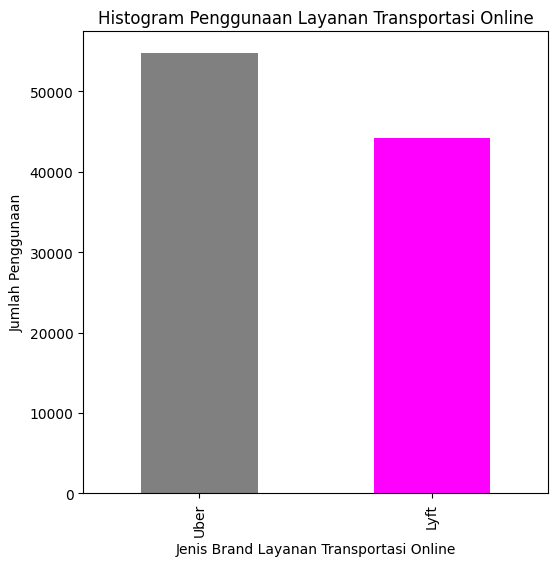

In [ ]:
# Visualisasi bar chart
df_cab_type.plot(kind='bar', figsize=(6,6), color=["grey", "magenta"])

plt.title('Histogram Penggunaan Layanan Transportasi Online')
plt.ylabel('Jumlah Penggunaan')
plt.xlabel('Jenis Brand Layanan Transportasi Online')

Berdasarkan pada plot yang dihasilkan terlihat bahwa pengguna jasa Uber lebih banyak dibandingkan Lyft dimana masing masing memiliki jumlah total 20409 penumpang Uber dan 19676 penumpang lyft

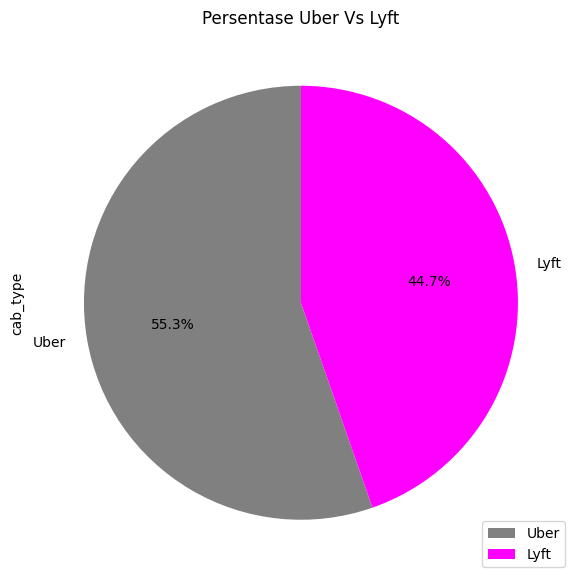

In [ ]:
# Visualisasi pie chart
df_cab_type.plot(kind='pie',
                figsize=(7,8),
                autopct='%1.1f%%',  #add in percentages
                startangle=90,      #start angle 90 derajat
                colors=['grey', 'magenta'],
        )
plt.title('Persentase Uber Vs Lyft')
plt.legend(labels = df_cab_type.index, loc='lower right')
plt.show()

Pada pie charts yang dihasilkan, diketahui bahwa persentase penggunaan Uber lebih besar daripada Lyft. hal ini semakin menunjukkan bahwa penggunaan Uber lebih diminati warga dibandingkan Lyft

**Melihat Persebaran Layanan Transportasi Online Berdasarkan Jenis Mobil**

In [ ]:
# Membuat variabel name
df_name = pd.DataFrame(df.groupby(['cab_type'])['name'].value_counts())
df_name

name
cab_type name              
Lyft     Lux Black XL  7382
         Shared        7373
         Lux Black     7352
         Lux           7349
         Lyft          7348
         Lyft XL       7345
Uber     UberPool      7835
         Taxi          7826
         UberXL        7819
         WAV           7813
         Black         7810
         Black SUV     7809
         UberX         7804

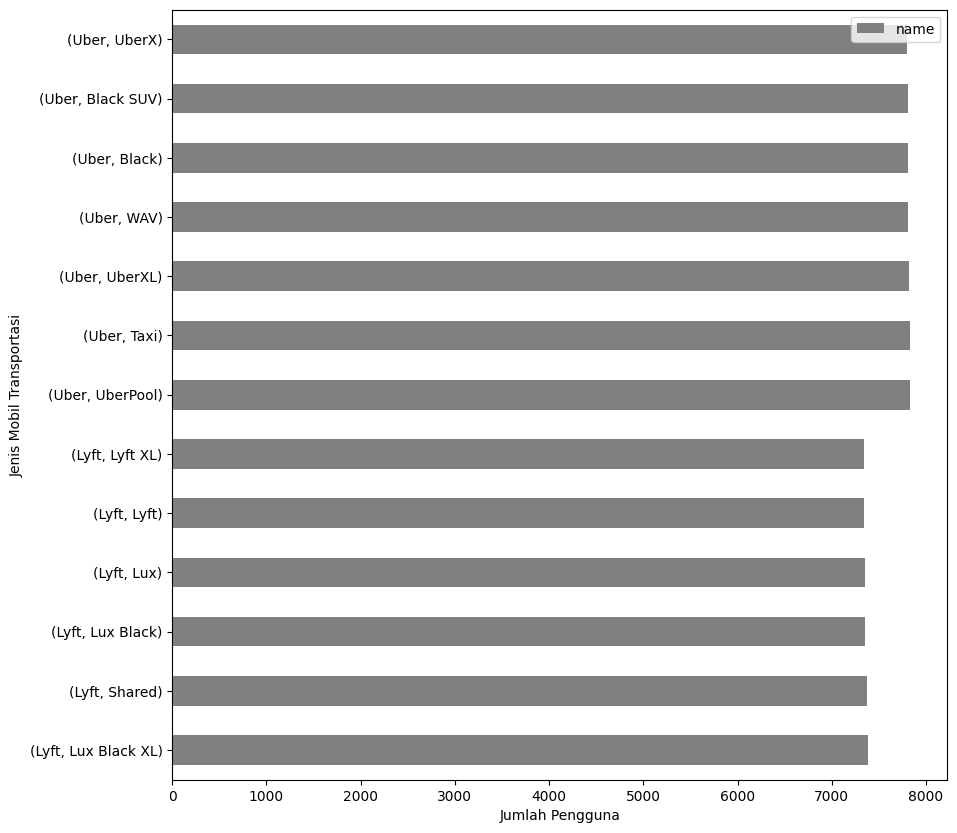

In [ ]:
# Visualisasi horizontal bar plot
df_name.plot(kind='barh', figsize=(10,10), color='grey')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Jenis Mobil Transportasi')
plt.show()

Bar chart yang dihasilkan menunjukkan bahwa dalam segi jenis mobil yang dilayankan Uber masih lebih unggul dibandingkan dengan Lyft.

## **3. Data Preparation + Feature Selection**

### **Data Cleaning**

**Mengecek Missing Value**

In [ ]:
# Mengcek missing value beserta persentasenya terhadap total data
pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})

,Missing_Value,Percent
id,0,0.0 %
timestamp,0,0.0 %
hour,0,0.0 %
day,0,0.0 %
month,0,0.0 %
datetime,0,0.0 %
timezone,0,0.0 %
source,0,0.0 %
destination,0,0.0 %
cab_type,0,0.0 %


Pada data atribut price terlihat missing values sekitar 7% dari keseluruhan data, sehingga perlu dilakukan penanganan untuk menghilangkan missing values.


Perlu digaris bawahi bahwa atribut price merupakan variabel dependen (yang dipengaruhi), sehingga penanganan tidak mungkin dilakukan dengan mengisi missing values tersebut karena dapat menyebabkan nilai akurasi yang kurang akurat. maka, penanganan dilakukan dengan menghapus baris yang terdapat missing values/drop missing value pada kolom price.

In [ ]:
df = df.dropna(subset=['price']).reset_index()

**Melihat Ulang Dataset yang Telah Dibersihkan**

In [ ]:
df

,index,id,timestamp,hour,day,month,datetime,timezone,source,destination,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91034,98860,21233e39-be1d-4d52-a763-0989f24170e5,1.543745e+09,10,2,12,2018-12-02 10:02:56,America/New_York,Beacon Hill,Haymarket Square,...,0.0888,1.543770e+09,36.60,1.543727e+09,50.99,1.543788e+09,35.85,1.543748e+09,50.32,1.543788e+09
91035,98861,3ee38d0f-df1f-4c46-bf25-c8e678973407,1.543432e+09,19,28,11,2018-11-28 19:11:08,America/New_York,Beacon Hill,Haymarket Square,...,0.0000,1.543421e+09,33.82,1.543399e+09,42.72,1.543439e+09,30.19,1.543399e+09,36.75,1.543439e+09
91036,98862,5bdc16fb-c68e-4145-86df-5742b76470a9,1.543798e+09,0,3,12,2018-12-03 00:42:56,America/New_York,Beacon Hill,Haymarket Square,...,0.0888,1.543770e+09,36.60,1.543727e+09,50.99,1.543788e+09,35.85,1.543748e+09,50.32,1.543788e+09
91037,98863,7145c340-d693-4855-8d24-2e68540eaf47,1.543770e+09,16,2,12,2018-12-02 16:52:59,America/New_York,Beacon Hill,Haymarket Square,...,0.1055,1.543770e+09,36.35,1.543727e+09,52.86,1.543788e+09,35.33,1.543745e+09,52.19,1.543788e+09


In [ ]:
# Mengcek missing value beserta persentasenya terhadap total data
pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})

,Missing_Value,Percent
index,0,0.0 %
id,0,0.0 %
timestamp,0,0.0 %
hour,0,0.0 %
day,0,0.0 %
month,0,0.0 %
datetime,0,0.0 %
timezone,0,0.0 %
source,0,0.0 %
destination,0,0.0 %


Saat ini dataset sudah terbebas dari missing value.

### **Data Preprocessing**

**Slicing Data**

Melakukan drop pada sejumlah atribut karena beberapa alasan seperti:

* **index** tidak diperlukan karena duplikasi dari index sudah ada
* **id** tidak diperlukan karena nilainya sangat unik dan mewakili setiap input
* **timestamp** dan **datetime** tidak diperlukan karena sudah dipecah menjadi month, day, dan hour
* **long_summary** karena sudah diwakili atribut short_summary
atribut yang berkaitan dengan waktu, seperti datetime, windGustTime dan lainnya, tidak diperlukan karena sudah diwakili oleh atribut month, day, dan hour
* **Longtitude** dan **Latitude** tidak diperlukan karena sudah diwakili oleh Destination
* dan yang lainnya

sehingga dari 57 atribut hanya diambil atribut berikut ini:

* cab_type: Brand transportasi online
* Name: jenis mobil yang dipilih
* Hour: jam pemesanan transportasi online
* Day: tanggal pemesanan transportasi online
* Month: Bulan pemesanan transportasi online
* Source: Destinasi awal
* destination: tujuan
* Price: Harga transportasi online
* Distance: Jarak tempuh
* Short_summary: Cuaca ketika pemesanan transportasi online
* windSpeed:Kecepatan angin
* Temperature: suhu ketika pemesanan transportasi online
* Visibility: jarak penglihatan
* Surge_multiplier: kenaikan harga penawaran ketika terjadi lonjakan penumpang

In [ ]:
df = df[['cab_type',
              'name', 
              'hour', 
              'day', 
              'month', 
              'source', 
              'destination', 
              'price', 
              'distance', 
              'short_summary', 
              'windSpeed', 
              'temperature', 
              'visibility', 
              'surge_multiplier']]
df

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,windSpeed,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,5.28,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,9.14,37.44,10.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91034,Lyft,Lux Black,10,2,12,Beacon Hill,Haymarket Square,16.5,1.39,Light Rain,4.00,38.92,4.183,1.0
91035,Lyft,Lyft,19,28,11,Beacon Hill,Haymarket Square,7.0,1.39,Overcast,9.54,41.47,10.000,1.0
91036,Lyft,Lux,0,3,12,Beacon Hill,Haymarket Square,13.5,1.39,Overcast,2.74,48.45,6.639,1.0
91037,Lyft,Lux Black XL,16,2,12,Beacon Hill,Haymarket Square,27.5,1.39,Light Rain,6.69,46.52,2.121,1.0


In [ ]:
# Mengecek total data pada setiap atribut
for col in df.columns:
    print(col,': ')
    print(df[col].value_counts())
    print("  ")
    print("  ")

cab_type : 
Uber    46890
Lyft    44149
Name: cab_type, dtype: int64
  
  
name : 
UberPool        7835
UberXL          7819
WAV             7813
Black           7810
Black SUV       7809
UberX           7804
Lux Black XL    7382
Shared          7373
Lux Black       7352
Lux             7349
Lyft            7348
Lyft XL         7345
Name: name, dtype: int64
  
  
hour : 
0     4332
23    4194
10    3966
2     3963
15    3955
16    3951
22    3937
14    3934
12    3916
13    3909
11    3905
18    3901
1     3894
17    3851
9     3843
4     3795
21    3669
6     3608
19    3586
20    3575
3     3574
5     3318
7     3273
8     3190
Name: hour, dtype: int64
  
  
day : 
28    10149
27     9946
29     8290
1      5886
30     5857
16     5786
14     5783
17     5772
15     5737
3      5730
2      5730
13     5086
18     4597
26     4385
4      1649
10      405
9       251
Name: day, dtype: int64
  
  
month : 
12    52412
11    38627
Name: month, dtype: int64
  
  
source : 
Theatre Distric

**Encoding**

In [ ]:
# Membuat dataframe df_rfe
df_rfe = pd.DataFrame(df_rfe, columns=['cab_type', 'name', 'source', 'destination', 'short_summary'])
df_rfe.head()

,cab_type,name,source,destination,short_summary
0,0.0,7.0,5.0,7.0,4.0
1,0.0,2.0,5.0,7.0,8.0
2,0.0,5.0,5.0,7.0,0.0
3,0.0,4.0,5.0,7.0,0.0
4,0.0,6.0,5.0,7.0,6.0


In [ ]:
# Menggabungkan data kategorik hasil encoding dan data numerik
df_rfe = df_rfe.join(df.drop(columns=['cab_type', 'name', 'source', 'destination', 'short_summary']))

In [ ]:
df_rfe

,cab_type,name,source,destination,short_summary,hour,day,month,price,distance,windSpeed,temperature,visibility,surge_multiplier
0,0.0,7.0,5.0,7.0,4.0,9,16,12,5.0,0.44,8.66,42.34,10.000,1.0
1,0.0,2.0,5.0,7.0,8.0,2,27,11,11.0,0.44,11.98,43.58,4.786,1.0
2,0.0,5.0,5.0,7.0,0.0,1,28,11,7.0,0.44,7.33,38.33,10.000,1.0
3,0.0,4.0,5.0,7.0,0.0,4,30,11,26.0,0.44,5.28,34.38,10.000,1.0
4,0.0,6.0,5.0,7.0,6.0,3,29,11,9.0,0.44,9.14,37.44,10.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21829,0.0,5.0,11.0,6.0,5.0,16,16,12,7.0,1.05,7.41,42.42,9.608,1.0
21830,0.0,2.0,11.0,6.0,3.0,6,27,11,13.5,1.05,11.62,43.03,2.642,1.0
21831,0.0,3.0,2.0,4.0,6.0,23,27,11,34.0,4.33,7.73,40.38,10.000,1.0
21832,0.0,4.0,2.0,4.0,5.0,22,28,11,42.5,4.33,9.08,40.43,10.000,1.0


In [ ]:
df_rfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21834 entries, 0 to 21833
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cab_type          21834 non-null  float64
 1   name              21834 non-null  float64
 2   source            21834 non-null  float64
 3   destination       21834 non-null  float64
 4   short_summary     21834 non-null  float64
 5   hour              21834 non-null  int64  
 6   day               21834 non-null  int64  
 7   month             21834 non-null  int64  
 8   price             21834 non-null  float64
 9   distance          21834 non-null  float64
 10  windSpeed         21834 non-null  float64
 11  temperature       21834 non-null  float64
 12  visibility        21834 non-null  float64
 13  surge_multiplier  21834 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 2.3 MB


### **Feature Selection**

Mengukur Pengaruh atribut pada label sesuai jenis atribut

**Correlation Matrix dengan Heatmap**

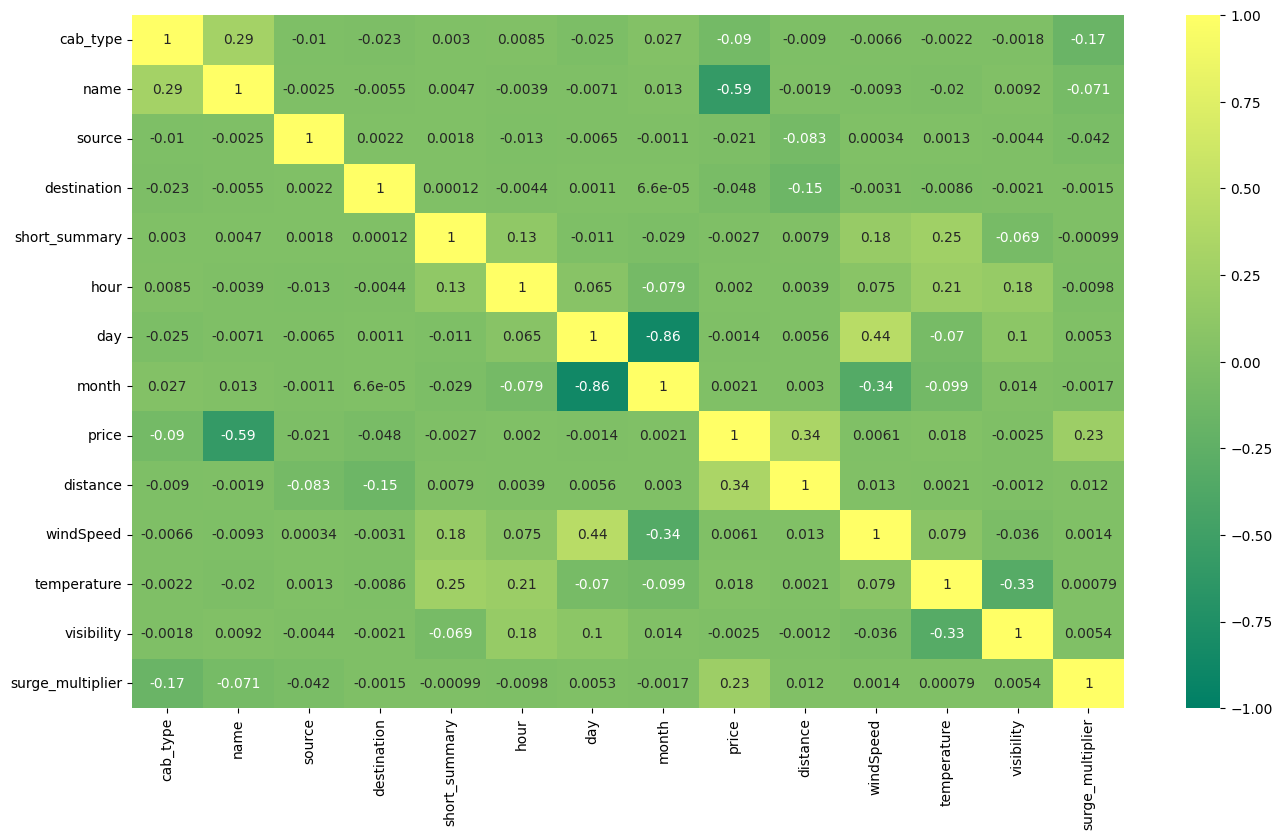

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df_rfe.corr(), vmin=-1, vmax=1, annot=True, cmap='summer')
plt.show()

Berdasarkan correlation matrix antara feature dan label (price), diketahui bahwa temperature, month, day, dan hour memiliki nilai korelasi sangat kecil terhadap atribut price, artinya fitur tersebut tidak terlalu berpengaruh terhadap label (price). sehingga atribut tersebut perlu dihilangkan dari dataset

**Menghapus Feature yang Tidak Penting Terhadap Label**

Selanjutnya menghapus beberapa atribut feature yang memiliki nilai korelasi yang sangat kecil karena atribut tersebut tidak memiliki kepentingan terhadap target (label).

In [ ]:
# Menghapus feature yang tidak penting
df_fix = df_rfe.drop(columns=['temperature', 'month', 'day', 'hour'])
df_fix.head()

,cab_type,name,source,destination,short_summary,price,distance,windSpeed,visibility,surge_multiplier
0,0.0,7.0,5.0,7.0,4.0,5.0,0.44,8.66,10.000,1.0
1,0.0,2.0,5.0,7.0,8.0,11.0,0.44,11.98,4.786,1.0
2,0.0,5.0,5.0,7.0,0.0,7.0,0.44,7.33,10.000,1.0
3,0.0,4.0,5.0,7.0,0.0,26.0,0.44,5.28,10.000,1.0
4,0.0,6.0,5.0,7.0,6.0,9.0,0.44,9.14,10.000,1.0


**Mendefinisikan X dan Y**

In [ ]:
X = df_fix.drop(['price'], axis=1)
Y = df_fix['price']
print('variabel X:', X.columns.tolist())
print('Variabel Y:', Y.name)

variabel X: ['cab_type', 'name', 'source', 'destination', 'short_summary', 'distance', 'windSpeed', 'visibility', 'surge_multiplier']
Variabel Y: price


Sampai tahap ini atribut feature (X) dan label (Y) telah siap untuk dilakukan pemodelan.

## **4. Data Validation (Modelling + Tuning Hyperparameters)**



### **Regression Modelling**

Setelah dilakukan data cleaning dan data preprocessing, maka diperoleh data feature dan data label untuk selanjutnya digunakan untuk melatih model. Feature yang digunakan diantaranya:

* cab_type
* name
* source
* destination
* distance
* short_summary
* windSpeed
* visibility
* surge_multiplier

Algoritma yang digunakan dalam pemodelan ini adalah **Linear Regression**.

**Split Data**

In [ ]:
# Membagi data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X.drop(['cab_type', 'name', 'source', 'destination', 'short_summary'], axis=1), Y,
                                                   test_size=0.2, random_state=10)

In [ ]:
# Membagi data training menjadi data training dan data validation untuk model inference
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                   test_size=0.1, random_state=10)

In [ ]:
# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

**Modelling**

In [ ]:
# Melatih model dengan data training
LR = LinearRegression()
Linear_Regression = LR.fit(X_train_scaled, Y_train)

In [ ]:
Y_predict = Linear_Regression.predict(X_test_scaled)

In [ ]:
skor = metrics.r2_score(Y_test, Y_predict) *100
print('Nilai Akurasi Model Linear Regression: %1.2f%%' %skor)

Nilai Akurasi Model Linear Regression: 16.97%


### **Tuning Hyperparameter Using GridSearchCV**

In [ ]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [ ]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [ ]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, Y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(Y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(Y_test, y_pred))
    print("\tR2 score:", r2_score(Y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.024s
	Prediction time: 0.037s
	Explained variance: 0.002273768776935192
	Mean absolute error: 7.364941607510876
	R2 score: 0.0020336335612263223

GradientBoostingRegressor()
	Training time: 0.930s
	Prediction time: 0.007s
	Explained variance: 0.1637153280555972
	Mean absolute error: 6.860862963379719
	R2 score: 0.16349093281453464

KNeighborsRegressor()
	Training time: 0.012s
	Prediction time: 0.022s
	Explained variance: 0.002273768776935192
	Mean absolute error: 7.364941607510876
	R2 score: 0.0020336335612263223

ExtraTreesRegressor()
	Training time: 2.890s
	Prediction time: 0.196s
	Explained variance: -0.18734057387941228
	Mean absolute error: 7.9538639035188154
	R2 score: -0.18787702004282392

RandomForestRegressor()
	Training time: 4.204s
	Prediction time: 0.146s
	Explained variance: -0.03926256367170966
	Mean absolute error: 7.529521256352862
	R2 score: -0.040263797085263286

DecisionTreeRegressor()
	Training time: 0.059s
	Prediction time: 0

## **5. Data Testing (Evaluation)**

**Kesimpulan:**
Berdasarkan turning hyperparameter yang telah dipaparkan sebelumnya dapat disimpulkan bahwa:
Random Forest adalah model terbaik dengan R2 score 0.96 , sedangkan Lasso adalah model dengan akurasi terendah yakni R2 score sekitar 0.45. Sedangkan untuk Linear Regression sendiri memiliki R2 score 0.50.
